# Predict Salary based on Years of experience

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Exploratory Data Analysis (EDA)**

In [3]:
df_sal.shape

(30, 2)

In [4]:
# No null values exists. Since both are numeric columns, no type conversion is required.
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
print('Median: ', df_sal.median())
print('Mode of YearsExperience: ', df_sal['YearsExperience'].mode().iloc[0])
print(df_sal.describe())

Median:  YearsExperience        4.7
Salary             65237.0
dtype: float64
Mode of YearsExperience:  3.2
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [6]:
# Check for duplicates. No duplicates exists.
df_sal[df_sal.duplicated()].shape

(0, 2)

In [7]:
# Check for nulls
df_sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Outlier Detection**

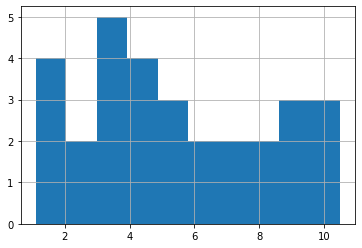

In [8]:
## Outlier Detection
df_sal['YearsExperience'].hist()

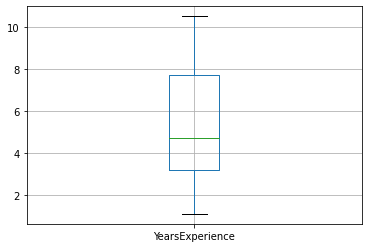

In [9]:
# Boxplot
df_sal.boxplot(column='YearsExperience')

In [10]:
# Check the relation between two columns
df_sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


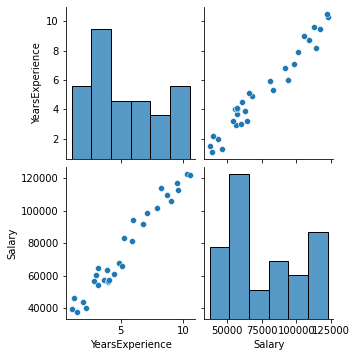

In [11]:
# Pairplot for visual analysis of correlation
sns.pairplot(data=df_sal)

Note: No type casting required since both are numeric continuous variable columns. 

Since YearsExperience column is maximum two digits and Salary is in 6 digits, normalization or standardization is required.

No null values exists. 

No duplicates exists. 

No outliers exists for input feature YearsExperince

Good positive relation exist between input and output variables

## SLR with actual data

In [12]:
import statsmodels.formula.api as smf
model_sal_act = smf.ols('Salary~YearsExperience', data = df_sal).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


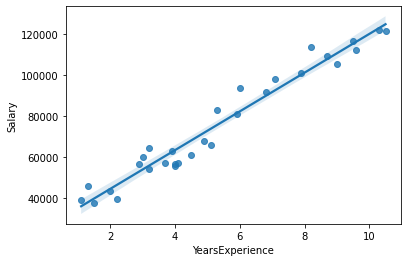

In [13]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data = df_sal)

In [14]:
model_sal_act.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model_sal_act.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        17:22:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Prediction and verification**

In [16]:
newdata_sal = pd.Series([1.1, 1.5, 2.0])
df_newdata_sal = pd.DataFrame(newdata_sal, columns=['YearsExperience'])
df_newdata_sal

,YearsExperience
0,1.1
1,1.5
2,2.0


In [17]:
model_sal_act.predict(df_newdata_sal)

0    36187.158752
1    39967.143681
2    44692.124842
dtype: float64

## SLR with Standardization

In [18]:
# Normalization or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sal_std = pd.DataFrame(scaler.fit_transform(df_sal))
df_sal_std.columns = ['YearsExperience', 'Salary']
df_sal_std.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [19]:
df_sal_std.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
import statsmodels.formula.api as smf
model_sal_std = smf.ols('Salary~YearsExperience', data = df_sal_std).fit()

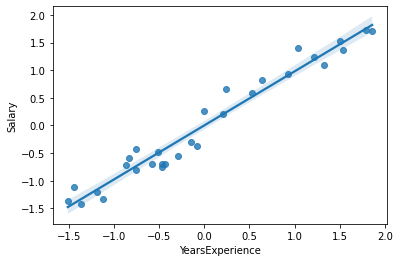

In [21]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data = df_sal_std)

In [22]:
model_sal_std.params

Intercept         -2.775558e-17
YearsExperience    9.782416e-01
dtype: float64

In [23]:
model_sal_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        17:22:36   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.776e-17      0.039  -7.08e-16      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Prediction and verification**

In [24]:
newdata_sal_std = pd.Series([-1.510053, -1.438373, -1.366693])
df_newdata_sal_std = pd.DataFrame(newdata_sal_std, columns=['YearsExperience'])
df_newdata_sal_std

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693


In [25]:
model_sal_std.predict(df_newdata_sal_std)

0   -1.477197
1   -1.407076
2   -1.336956
dtype: float64

## SLR with Log Transformation

In [26]:
df_sal_log = pd.DataFrame()

In [27]:
# Applying log for columns
df_sal_log['YearsExperience'] = np.log10(df_sal['YearsExperience'])
df_sal_log['Salary'] = np.log10(df_sal['Salary'])
df_sal_log.head()

,YearsExperience,Salary
0,0.041393,4.594867
1,0.113943,4.664689
2,0.176091,4.576698
3,0.301030,4.638739
4,0.342423,4.600875


In [28]:
df_sal_log.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


In [29]:
import statsmodels.formula.api as smf
model_sal_log = smf.ols('Salary~YearsExperience', data = df_sal_log).fit()

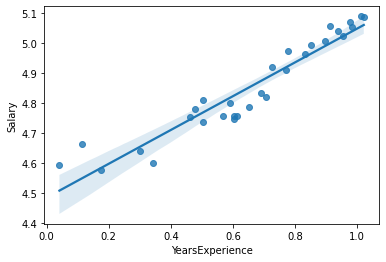

In [30]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data = df_sal_log)

In [31]:
model_sal_log.params

Intercept          4.485412
YearsExperience    0.562089
dtype: float64

In [32]:
model_sal_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.40e-16
Time:                        17:22:37   Log-Likelihood:                 48.230
No. Observations:                  30   AIC:                            -92.46
Df Residuals:                      28   BIC:                            -89.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.4854      0.024    184.868      0.000       4.436       4.535
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Prediction and verification**

In [33]:
newdata_sal_log = pd.Series([0.041393, 0.113943, 0.176091])
df_newdata_sal_log = pd.DataFrame(newdata_sal_log, columns=['YearsExperience'])
df_newdata_sal_log

,YearsExperience
0,0.041393
1,0.113943
2,0.176091


In [34]:
model_sal_log.predict(df_newdata_sal_log)

0    4.508679
1    4.549458
2    4.584391
dtype: float64

## SLR with Square Root Transformation

In [35]:
df_sal_sqrt = pd.DataFrame()

In [36]:
# Applying square root for columns
df_sal_sqrt['YearsExperience'] = np.sqrt(df_sal['YearsExperience'])
df_sal_sqrt['Salary'] = np.sqrt(df_sal['Salary'])
df_sal_sqrt.head()

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314


In [37]:
df_sal_sqrt.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970541
Salary,0.970541,1.000000


In [38]:
import statsmodels.formula.api as smf
model_sal_sqrt = smf.ols('Salary~YearsExperience', data = df_sal_sqrt).fit()

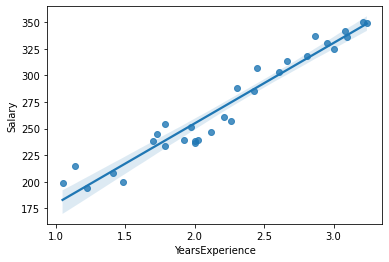

In [39]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data = df_sal_sqrt)

In [40]:
model_sal_sqrt.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [41]:
model_sal_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.58e-19
Time:                        17:22:37   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Prediction and verification**

In [42]:
newdata_sal_sqrt = pd.Series([1.048809, 1.140175, 1.224745])
df_newdata_sal_sqrt = pd.DataFrame(newdata_sal_sqrt, columns=['YearsExperience'])
df_newdata_sal_sqrt

,YearsExperience
0,1.048809
1,1.140175
2,1.224745


In [43]:
model_sal_sqrt.predict(df_newdata_sal_sqrt)

0    182.886237
1    189.795968
2    196.191737
dtype: float64

Final Conclusion:

All four models parameters are as follows.

With actual data: Correlation: 0.978242 R-Squared: 0.957 Adj. R-squared: 0.955

With standardized data: Correlation: 0.978242 R-Squared: 0.957 Adj. R-squared: 0.955. However, p value of intercept is 1.000 which is very much high compared to alpha value 0.05. p value of YearsExperience column is zero only.

With Log Transformation: Correlation: 0.951428 R-Squared: 0.905 Adj. R-squared: 0.902

With Square Root Transformation: Correlation: 0.970541 R-squared: 0.942 Adj. R-squared: 0.940

After observing all four models, SLR with actual data and SLR with Standardized data models, have good correlation, R-Squared and Adj. R-Squared values. However, p-values for intercept for Standardized model is much greater than 0.05. But, this may not be major concern.

So, SLR with actual data is good model for prediction of salary based on years of experience values.
